<a href="https://colab.research.google.com/github/VDidyk/AI/blob/master/module3/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_%D0%BB%D1%96%D0%BD%D1%96%D0%B9%D0%BD%D0%B0_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%96%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module3/data/Student_Performance.csv", index_col="Unnamed: 0")

[Інформація про дані](https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression)

In [3]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7.0,99.0,NaN,9.0,1.0,91.0
1,4.0,82.0,No,4.0,2.0,65.0
2,8.0,51.0,Yes,7.0,2.0,45.0
3,5.0,52.0,Yes,5.0,2.0,36.0
4,7.0,75.0,No,8.0,5.0,66.0


# Завдання 1
Продивтіться дані, очистіть від викидів, видаліть пропущені значення з стовпчика `Perfomance Index`

In [4]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,9496.000000,9474.000000,9504.000000,9487.000000,9506.000000
mean,4.995577,69.366160,6.526831,4.586908,55.277930
std,2.583372,17.326214,1.695397,2.862329,19.212206
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     9496 non-null   float64
 1   Previous Scores                   9474 non-null   float64
 2   Extracurricular Activities        9495 non-null   object 
 3   Sleep Hours                       9504 non-null   float64
 4   Sample Question Papers Practiced  9487 non-null   float64
 5   Performance Index                 9506 non-null   float64
dtypes: float64(5), object(1)
memory usage: 546.9+ KB


<ipython-input-6-abacd12372e3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr(method='spearman')


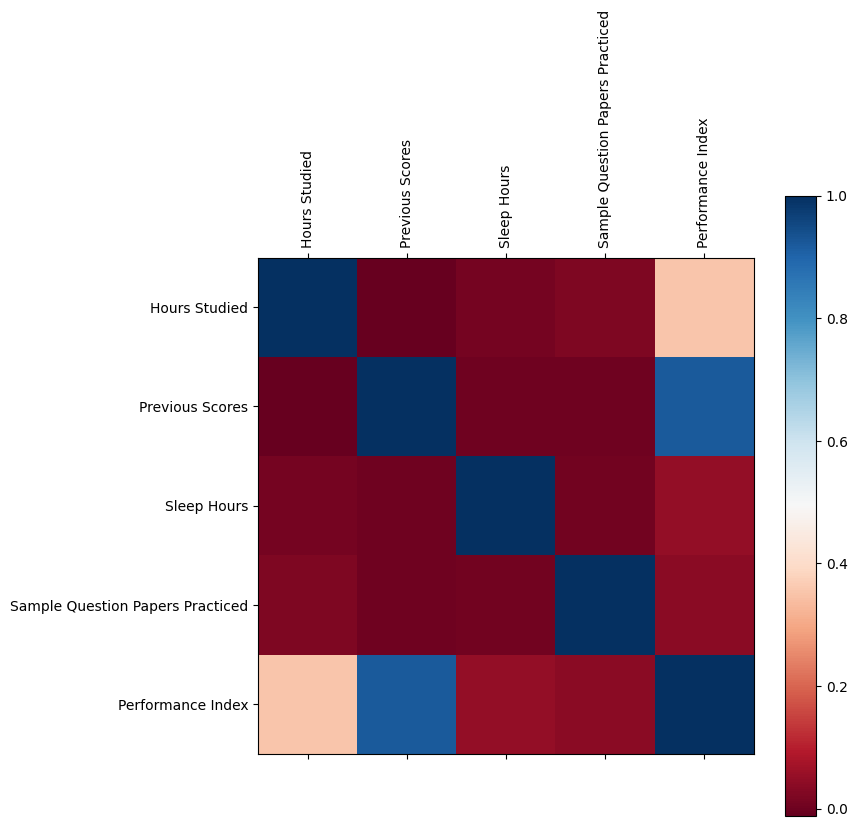

In [6]:
corr = df.corr(method='spearman')

fig = plt.figure(figsize=(8,8))
plt.matshow(corr, cmap='RdBu', fignum=fig.number)

plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr.columns)), corr.columns)
plt.colorbar()


In [7]:
df.shape

(10000, 6)

In [8]:
num_columns = df.select_dtypes(include="number").columns
sales_num = df[num_columns]

q1 = sales_num.quantile(q=0.25)
q3 = sales_num.quantile(q=0.75)

iqr = q3 - q1

lower = q1 - 1.5*iqr
upper = q3 + 1.5*iqr

mask = (sales_num >= lower) & (sales_num <= upper)
mask = mask.all(axis=1)

df = df[mask]

In [10]:
df.shape

(7706, 6)

In [12]:
df=df.dropna()
df.shape

(7316, 6)

# Завдання 2
Розбийте дані на тренувальні та тестові

In [16]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
1,4.0,82.0,No,4.0,2.0,65.0
2,8.0,51.0,Yes,7.0,2.0,45.0
3,5.0,52.0,Yes,5.0,2.0,36.0
4,7.0,75.0,No,8.0,5.0,66.0
5,3.0,78.0,No,9.0,6.0,61.0


In [24]:
y = df["Performance Index"]
X = df.drop(columns=["Performance Index"])
X = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=42)

# Завдання 3
Побудуйте `Ppileline` для заповнення пропущених значень в усіч стовпчиках

# Завдання 4
Побудуйте модель та натренуйте її, виведіть метрики

In [25]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [26]:
y_pred = model.predict(X_test)

In [27]:
from sklearn import metrics

def get_metrics(y_true, y_pred, name="model"):
  df = pd.DataFrame()

  df.loc["MAE", name] = metrics.mean_absolute_error(y_true, y_pred)
  df.loc["MSE", name] = metrics.mean_squared_error(y_true, y_pred)
  df.loc["RMSE", name] = metrics.mean_squared_error(y_true, y_pred) ** 0.5
  df.loc["R2", name] = metrics.r2_score(y_true, y_pred)

  return df.round(2)


all_metrics = pd.DataFrame()


all_metrics["train"] = get_metrics(y_train, model.predict(X_train))
all_metrics["test"] = get_metrics(y_test, y_pred)
all_metrics["mean"] = get_metrics(y_test, np.full_like(y_test, y_test.mean()), "mean")


all_metrics

,train,test,mean
MAE,1.62,1.58,15.89
MSE,4.18,4.03,356.32
RMSE,2.04,2.01,18.88
R2,0.99,0.99,0.00


In [28]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
1,4.0,82.0,No,4.0,2.0,65.0
2,8.0,51.0,Yes,7.0,2.0,45.0
3,5.0,52.0,Yes,5.0,2.0,36.0
4,7.0,75.0,No,8.0,5.0,66.0
5,3.0,78.0,No,9.0,6.0,61.0


In [35]:
y_pred = model.predict([[4, 82, 1, 0, 4, 2]])
y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([60.97335503])

# Завдання 5 оптимально
Спробуйте покращити модель

In [36]:
import joblib
joblib.dump(model, 'my_model.pkl')

['my_model.pkl']